In [1]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

In [2]:
import keras
import tensorflow
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import LSTM
from keras import backend as K
from keras.layers import *
from keras.optimizers import Adam

In [3]:
os.getcwd()

'C:\\Users\\kyj23\\Desktop\\my\\practice\\python'

In [4]:
new_path=os.path.join(os.getcwd(),'data')

pathName=os.path.join(new_path,'Dataset/라벨수정')
pathName

'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정'

In [5]:
glob.glob(pathName+"/*")

['C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\Error Lot list.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.06_labeling.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.07_labeling.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.08_labeling.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.09_labeling.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.10_labeling.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.13_labeling.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.14_labeling.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.15_labeling.csv',
 'C:

In [6]:
dataList=list()

for pth in glob.glob(pathName+'/*')[1:]:
    origin = pd.read_csv(pth,index_col=False)
    dataList.append(origin)

CatList=pd.concat(dataList,axis=0,ignore_index=True)
CatList

,Index,Process,Time,Temp,Current,Date,Label,Unnamed: 7,Unnamed: 8
0,1,1,오후 4:24:03.0,75.139142,1.610,2022-09-06,0,NaN,NaN
1,2,1,오후 4:24:08.0,76.660421,1.530,2022-09-06,0,NaN,NaN
2,3,1,오후 4:24:13.0,77.177660,1.701,2022-09-06,0,NaN,NaN
3,4,1,오후 4:24:18.0,76.586434,1.736,2022-09-06,0,NaN,NaN
4,5,1,오후 4:24:23.0,77.877104,1.748,2022-09-06,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
51079,1544,43,오후 6:45:03.4,67.312474,1.560,2022-10-27,0,NaN,NaN
51080,1545,43,오후 6:45:08.4,65.533664,1.472,2022-10-27,0,NaN,NaN
51081,1546,43,오후 6:45:13.4,66.740424,1.523,2022-10-27,0,NaN,NaN
51082,1547,43,오후 6:45:18.4,68.045185,1.483,2022-10-27,0,NaN,NaN


In [7]:
df = CatList.drop([CatList.columns[7],CatList.columns[8]], axis=1)
df

,Index,Process,Time,Temp,Current,Date,Label
0,1,1,오후 4:24:03.0,75.139142,1.610,2022-09-06,0
1,2,1,오후 4:24:08.0,76.660421,1.530,2022-09-06,0
2,3,1,오후 4:24:13.0,77.177660,1.701,2022-09-06,0
3,4,1,오후 4:24:18.0,76.586434,1.736,2022-09-06,0
4,5,1,오후 4:24:23.0,77.877104,1.748,2022-09-06,0
...,...,...,...,...,...,...,...
51079,1544,43,오후 6:45:03.4,67.312474,1.560,2022-10-27,0
51080,1545,43,오후 6:45:08.4,65.533664,1.472,2022-10-27,0
51081,1546,43,오후 6:45:13.4,66.740424,1.523,2022-10-27,0
51082,1547,43,오후 6:45:18.4,68.045185,1.483,2022-10-27,0


In [8]:
df = df.drop(['Index','Process','Time','Date'], axis=1)
df

,Temp,Current,Label
0,75.139142,1.610,0
1,76.660421,1.530,0
2,77.177660,1.701,0
3,76.586434,1.736,0
4,77.877104,1.748,0
...,...,...,...
51079,67.312474,1.560,0
51080,65.533664,1.472,0
51081,66.740424,1.523,0
51082,68.045185,1.483,0


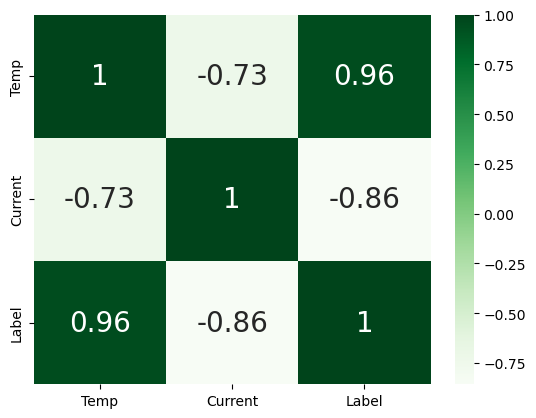

In [9]:
corr=df.corr()

sns.heatmap(corr, annot=True, cmap='Greens', annot_kws={'size':20})
plt.show()

In [10]:
scaler = StandardScaler()
df_data = df.drop(['Label'], axis=1) 
df_scaled = scaler.fit_transform(df_data)
df_scaled

array([[ 0.04834502,  0.27659986],
       [ 0.16649822, -0.23033417],
       [ 0.20667061,  0.85323733],
       ...,
       [-0.60395836, -0.2746909 ],
       [-0.50262144, -0.52815792],
       [-0.46943391, -0.35073101]])

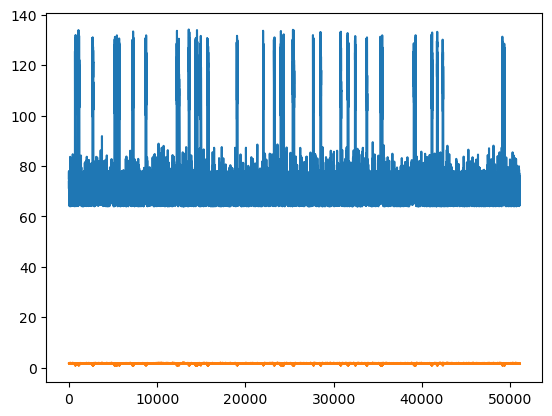

In [11]:
plt.plot(df_data)
plt.show()

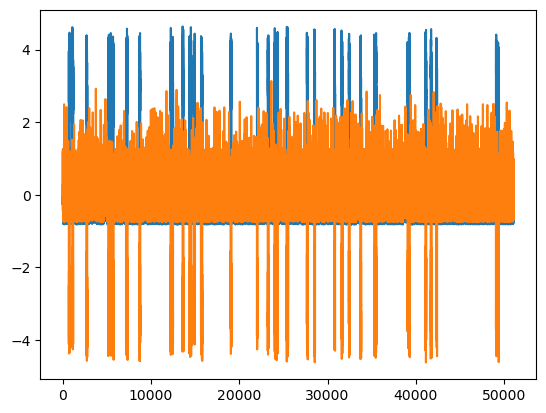

In [12]:
plt.plot(df_scaled)
plt.show()

In [13]:
df_scale = pd.DataFrame(df_scaled, columns=['Temp', 'Current'])
df_scale['Label'] = df['Label']
df_scale

,Temp,Current,Label
0,0.048345,0.276600,0
1,0.166498,-0.230334,0
2,0.206671,0.853237,0
3,0.160752,1.075021,0
4,0.260994,1.151061,0
...,...,...,...
51079,-0.559529,-0.040234,0
51080,-0.697684,-0.597861,0
51081,-0.603958,-0.274691,0
51082,-0.502621,-0.528158,0


In [14]:
train_data=df_scale[:35604]
test_data=df_scale[35604:]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35604 entries, 0 to 35603
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Temp     35604 non-null  float64
 1   Current  35604 non-null  float64
 2   Label    35604 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 834.6 KB


In [15]:
ng_idx_train=train_data[train_data['Label']==1].index
ok_idx_train=train_data[train_data['Label']==0].index
ok_train=train_data.loc[ok_idx_train]
ng_train=train_data.loc[ng_idx_train]
ok_train

,Temp,Current,Label
0,0.048345,0.276600,0
1,0.166498,-0.230334,0
2,0.206671,0.853237,0
3,0.160752,1.075021,0
4,0.260994,1.151061,0
...,...,...,...
35599,-0.532505,-0.249344,0
35600,-0.492333,-0.300038,0
35601,-0.460584,-0.217661,0
35602,-0.671010,-0.147957,0


In [16]:
TIME_STEP=36
def sequences(x,y,time_steps=TIME_STEP):
    xs,ys=[],[]
    for i in range(len(x)-time_steps):
        xs.append(x.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i:(i+time_steps)].values)
        
    return np.array(xs), np.array(ys)
    
X_train, Y_train = sequences(ok_train[['Temp','Current']],ok_train[['Temp','Current']])
X_train

array([[[ 0.04834502,  0.27659986],
        [ 0.16649822, -0.23033417],
        [ 0.20667061,  0.85323733],
        ...,
        [-0.60395836, -0.41409776],
        [-0.50262144, -0.52815792],
        [-0.54710092, -0.35706768]],

       [[ 0.16649822, -0.23033417],
        [ 0.20667061,  0.85323733],
        [ 0.16075187,  1.07502097],
        ...,
        [-0.50262144, -0.52815792],
        [-0.54710092, -0.35706768],
        [ 0.05338504, -0.16696742]],

       [[ 0.20667061,  0.85323733],
        [ 0.16075187,  1.07502097],
        [ 0.26099432,  1.15106107],
        ...,
        [-0.54710092, -0.35706768],
        [ 0.05338504, -0.16696742],
        [ 0.18291414, -0.2493442 ]],

       ...,

       [[-0.60395836, -0.41409776],
        [-0.65795547, -0.38241438],
        [-0.54710092, -0.35706768],
        ...,
        [-0.57299108, -0.16696742],
        [-0.53250489, -0.2493442 ],
        [-0.4923325 , -0.3000376 ]],

       [[-0.65795547, -0.38241438],
        [-0.54710092, -0.35

In [17]:
X_test, Y_test = sequences(test_data[['Temp','Current']], test_data[['Label']])
X_test

array([[[ 0.11846597, -0.47746451],
        [-0.09352687, -0.31904763],
        [ 0.07898631,  0.98630751],
        ...,
        [-0.75929239, -0.42043444],
        [-0.50262144, -0.67390145],
        [-0.54710092, -0.64221808]],

       [[-0.09352687, -0.31904763],
        [ 0.07898631,  0.98630751],
        [ 0.01737774,  0.59343363],
        ...,
        [-0.50262144, -0.67390145],
        [-0.54710092, -0.64221808],
        [-0.11453507, -0.16696742]],

       [[ 0.07898631,  0.98630751],
        [ 0.01737774,  0.59343363],
        [ 0.04104764,  0.91660408],
        ...,
        [-0.54710092, -0.64221808],
        [-0.11453507, -0.16696742],
        [ 0.06180715, -0.2493442 ]],

       ...,

       [[-0.79043444, -0.57885132],
        [-0.77801688, -0.2746909 ],
        [-0.59808191, -0.69924816],
        ...,
        [-0.73587116, -0.09092731],
        [-0.55952895, -0.04023391],
        [-0.69768381, -0.59786135]],

       [[-0.77801688, -0.2746909 ],
        [-0.59808191, -0.69

In [18]:
timesteps = TIME_STEP
features = 2


Lstm_AE = Sequential()

Lstm_AE.add(LSTM(140,activation='relu', input_shape=(timesteps, features), return_sequences=True))
Lstm_AE.add(LSTM(70,activation='relu', return_sequences=False))
Lstm_AE.add(RepeatVector(timesteps))

Lstm_AE.add(LSTM(70,activation='relu', return_sequences=True))
Lstm_AE.add(LSTM(140,activation='relu', return_sequences=True))
Lstm_AE.add(TimeDistributed(Dense(features)))

Lstm_AE.compile(loss='mse', optimizer=keras.optimizers.Adam(0.01))
Lstm_AE.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 36, 140)           80080     
                                                                 
 lstm_1 (LSTM)               (None, 70)                59080     
                                                                 
 repeat_vector (RepeatVector  (None, 36, 70)           0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 36, 70)            39480     
                                                                 
 lstm_3 (LSTM)               (None, 36, 140)           118160    
                                                                 
 time_distributed (TimeDistr  (None, 36, 2)            282       
 ibuted)                                                

In [19]:
epochs=50
batch=32
history = Lstm_AE.fit(X_train, Y_train, epochs=epochs, batch_size=batch, validation_split=0.2)

Epoch 1/50
808/808 [==============================] - 381s 464ms/step - loss: 111916425216.0000 - val_loss: 0.1556
Epoch 2/50
808/808 [==============================] - 300s 372ms/step - loss: 3000440193024.0000 - val_loss: 0.1456
Epoch 3/50
808/808 [==============================] - 317s 392ms/step - loss: 0.1304 - val_loss: 0.1330
Epoch 4/50
808/808 [==============================] - 296s 366ms/step - loss: 0.1015 - val_loss: 0.0725
Epoch 5/50
808/808 [==============================] - 294s 364ms/step - loss: 0.0643 - val_loss: 0.0630
Epoch 6/50
808/808 [==============================] - 296s 367ms/step - loss: 0.0562 - val_loss: 0.0564
Epoch 7/50
808/808 [==============================] - 295s 366ms/step - loss: 0.0529 - val_loss: 0.0549
Epoch 8/50
808/808 [==============================] - 296s 366ms/step - loss: 0.0513 - val_loss: 0.0525
Epoch 9/50
808/808 [==============================] - 296s 367ms/step - loss: 0.0497 - val_loss: 0.0517
Epoch 10/50
808/808 [====================

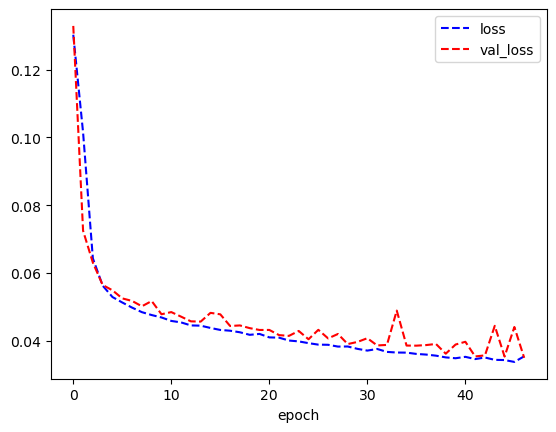

In [21]:
plt.plot(history.history['loss'][2:49], 'b--', label='loss')
plt.plot(history.history['val_loss'][2:49], 'r--', label='val_loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [22]:
prediction = Lstm_AE.predict(X_test)
mse=np.mean(np.power(X_test-prediction,2),axis=1)
error_df=pd.DataFrame(mse)
error_df.columns = ['Temp_error', 'Current_error']
error_df['reconstruction_error'] = error_df['Temp_error'] + error_df['Current_error']
error_df['Label'] = Y_test[:,0]
error_df.describe()

483/483 [==============================] - 30s 61ms/step


,Temp_error,Current_error,reconstruction_error,Label
count,1.544400e+04,1.544400e+04,1.544400e+04,15444.00000
mean,1.388082e+11,1.126464e+11,2.514547e+11,0.04662
std,6.428577e+12,4.807315e+12,1.116103e+13,0.21083
min,4.332328e-03,1.335728e-02,2.001719e-02,0.00000
25%,9.702132e-03,3.236569e-02,4.209223e-02,0.00000
50%,1.350171e-02,4.567731e-02,6.035217e-02,0.00000
75%,2.424742e-02,8.176489e-02,1.061788e-01,0.00000
max,7.078688e+14,5.046290e+14,1.212498e+15,1.00000


In [23]:
error_df['Label'] = Y_test[:,0]
error_df.describe()

,Temp_error,Current_error,reconstruction_error,Label
count,1.544400e+04,1.544400e+04,1.544400e+04,15444.00000
mean,1.388082e+11,1.126464e+11,2.514547e+11,0.04662
std,6.428577e+12,4.807315e+12,1.116103e+13,0.21083
min,4.332328e-03,1.335728e-02,2.001719e-02,0.00000
25%,9.702132e-03,3.236569e-02,4.209223e-02,0.00000
50%,1.350171e-02,4.567731e-02,6.035217e-02,0.00000
75%,2.424742e-02,8.176489e-02,1.061788e-01,0.00000
max,7.078688e+14,5.046290e+14,1.212498e+15,1.00000


In [25]:
thr = np.percentile(error_df['reconstruction_error'],90)
thr

0.1697227035883091

13899


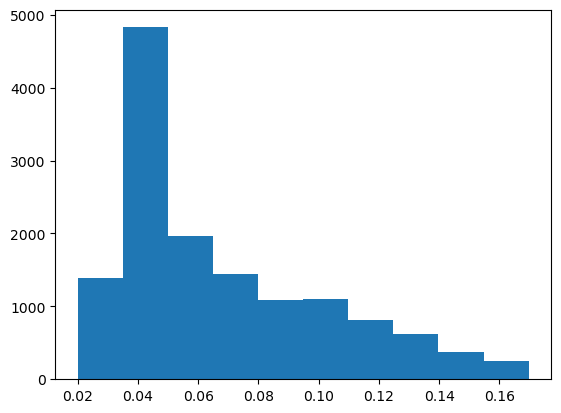

In [26]:
thr = np.percentile(error_df['reconstruction_error'],90)
fig=plt.figure()
ax=fig.add_subplot(111)
error_df_0=error_df[error_df['reconstruction_error']<thr]
print(len(error_df_0))
_=ax.hist(error_df_0.reconstruction_error.values,bins=10)

1545


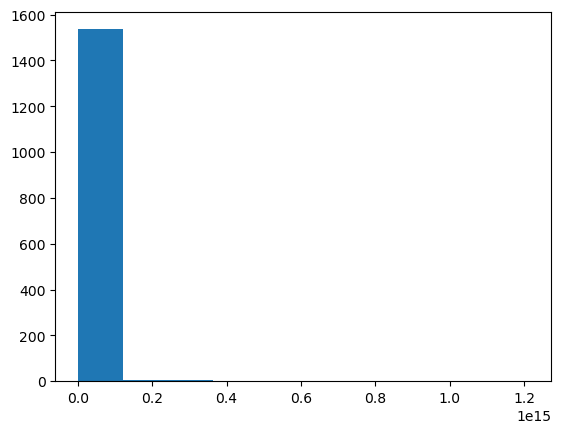

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111)
error_df_1=error_df[error_df['reconstruction_error']>thr]
print(len(error_df_1))
_=ax.hist(error_df_1.reconstruction_error.values,bins=10)

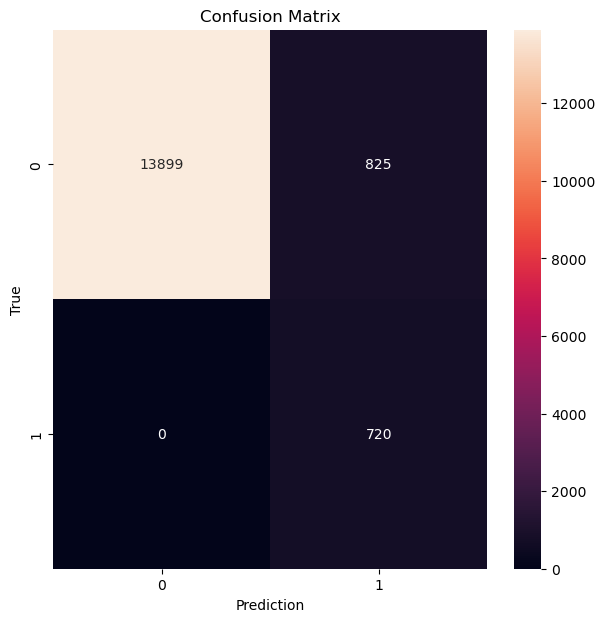

In [28]:
Y_predict=[1 if e>thr else 0 for e in error_df['reconstruction_error'].values]
conf_matrix=confusion_matrix(error_df['Label'],Y_predict)
plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction'); plt.ylabel('True')
plt.show()

In [29]:
TP = conf_matrix[0][0]
FN = conf_matrix[0][1]
FP = conf_matrix[1][0]
TN = conf_matrix[1][1]

Recall=TP/(TP+FN)
Precision = TP/(TP+FP)
Accuracy=(TP+TN)/(TP+FP+FN+TN)
F1_Score=2*(Recall*Precision)/(Recall+Precision)
Recall, Precision, Accuracy, F1_Score

(0.9439690301548492, 1.0, 0.9465811965811965, 0.9711770254690284)

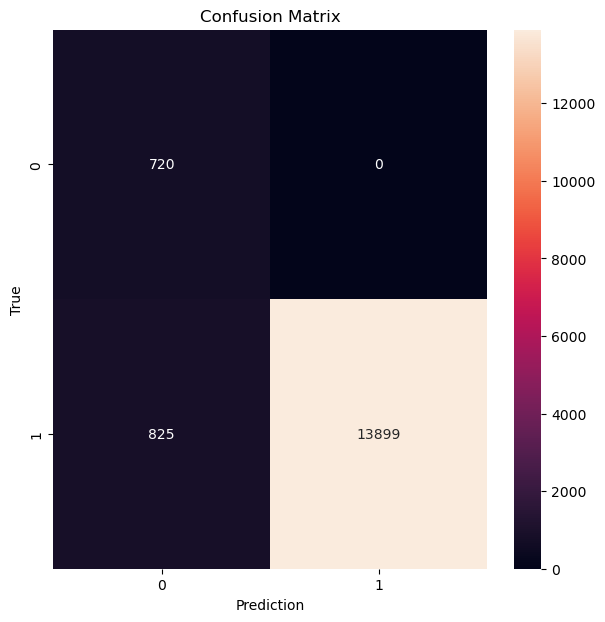

In [32]:
Y_predict2=[0 if e>thr else 1 for e in error_df['reconstruction_error'].values]
error_df['Label2'] = [1 if e==0 else 0 for e in error_df['Label'].values]
conf_matrix=confusion_matrix(error_df['Label2'],Y_predict2)
plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction'); plt.ylabel('True')
plt.show()

In [33]:
accuracy = accuracy_score(error_df['Label2'], Y_predict2)
precisioin = precision_score(error_df['Label2'], Y_predict2)
recall = recall_score(error_df['Label2'], Y_predict2)
f1 = f1_score(error_df['Label2'], Y_predict2)
roc_auc = roc_auc_score(error_df['Label2'], Y_predict2)
accuracy, precisioin, recall, f1, roc_auc 

(0.9465811965811965,
 1.0,
 0.9439690301548492,
 0.9711770254690284,
 0.9719845150774247)

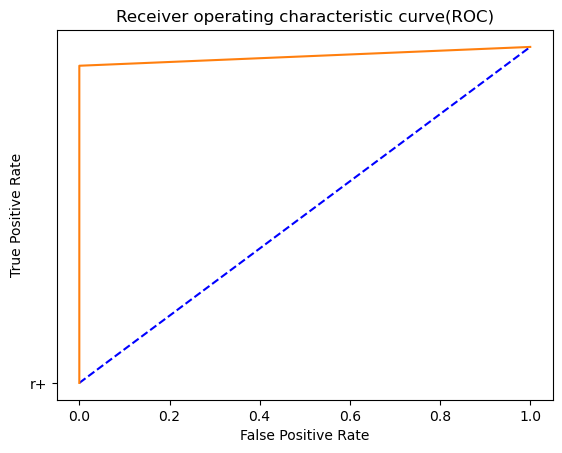

0.9719845150774247

In [34]:
fpr, tpr, thresholds = roc_curve(error_df['Label2'], Y_predict2)
plt.plot([0,1], [0,1], "b--", "r+")
plt.plot(fpr, tpr, label='RandomForest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve(ROC)')
plt.show()
roc_auc